**Импорт необходимых библиотек**

In [14]:
from urllib.parse import urlparse # функция urlparse библиотеки urllib, которая помогает раскладывать URL-адреса на составляющие
import re # импорт библиотеки re, которая позволяет работать с регулярными выражениями
import json # импорт библиотеки json, которая позволяет обрабатывать json файлы
import numpy as np # импорт библиотеки numpy, которая помогает в работе с массивами и матрицами
import matplotlib.pyplot as plt # модуль библиотеки Matplotlib, который помогает в создании графиков и различных типов диаграмм
import pandas as pd # импорт библиотеки pandas, которая является мощным инструментом для анализа и манипулирования данными
from pandas.io.excel import ExcelWriter # функция ExcelWriter, которая позволяет записывать DataFrame в excel файлы

**Загрузка json в Google Colab**

1. 'from google.colab import files' - импорт модуля 'files' из библиотеки 'google.colab', который предоставляет функции для работы с файлами в среде Google Colab;
2. 'uploaded = files.upload()' - открытие диалогового окна, которое способствует загурзке файлов.

In [4]:
from google.colab import files
uploaded = files.upload()

Saving verified_online.json to verified_online.json


**Функция для обработки json файла**

После работы функция создает текстовый файл и записывает в него URL-адреса из json файла. В процессе формирования текстового файла игнорируются те URL-адреса, доменное имя которых уже присутствовало в записанных ранее URL-адресах, также игнорируются URL-адреса, состоящие только из доменного имени и протокола.

Примечания:

1. 'urlparse(data[a]['url']).netloc' - возвращает доменное имя URL-адреса
2. 'urlparse(data[a]['url']).path' - возвращает путь URL-адреса



In [23]:
def getUrls(json_path, output_path):
    domains = []
    with open(output_path, 'a+') as fileTxt:
        with open(json_path, 'r') as file:
            data = json.load(file)
            for a in range(len(data)):
                if urlparse(data[a]['url']).netloc in domains or len(urlparse(data[a]['url']).path) < 2:
                    continue
                else:
                    fileTxt.write(data[a]['url'] + '\n')
                    domains.append(urlparse(data[a]['url']).netloc)

In [25]:
getUrls("verified_online.json", "phishing_urls.txt")

**Функции для анализа характеристик фишинговых URL-адресов**


---

Примечания:

1. 'urlparse(url).netloc' - возвращает доменное имя '\n'
2. 'urlparse(url).scheme' - возвращает протокол
3. 'urlparse(url).path' - возвращает путь

**Анализ количества терминов в доменном имени фишинговых URL-адресов**

*Входные данные*: путь к файлу с фишинговыми URL-адресами

*Выходные данные*: массив данных NumPy, содержащий число терминов в каждой обработанной ссылке

In [16]:
def termsAnalysis(urls_path):
    with open(urls_path, 'r') as file:
        terms_number_data = []
        for url in file:
            domain = urlparse(url).netloc
            domain_terms = domain.split('.')
            terms_number_data.append(len(domain_terms))
    return np.array(terms_number_data)

**Анализ длины доменных имен фишинговых URL-адресов**

*Входные данные*: путь к файлу с фишинговыми URL-адресами

*Выходные данные*: массив данных NumPy, содержащий число терминов в каждой обработанной ссылке

In [26]:
def domainLengthAnalysis(urls_path):
    with open(urls_path, 'r') as file:
        domain_length_data = []
        for url in file:
            domain = urlparse(url).netloc
            domain_length_data.append(len(domain))
    return np.array(domain_length_data)

**Анализ количества слэшей в фишинговых URL-адресах**

*Входные данные*: путь к файлу с фишинговыми URL-адресами

*Выходные данные*: массив данных NumPy, содержащий число слэшей в каждой обработанной ссылке

In [27]:
def slashesNumberAnalysis(urls_path):
    with open(urls_path, 'r') as file:
        slashes_number_data = []
        for url in file:
            i = 0
            for a in url:
                if a == '/':
                    i += 1
            slashes_number_data.append(i)
    return np.array(slashes_number_data)

**Анализ наличия специальных символов в доменном имени фишинговых URL-адресов**

*Входные данные*: путь к файлу с фишинговыми URL-адресами

*Выходные данные*: словарь, содержащий ключи "contain"(содержит) и "dont contain" (не содержит), и соответствующие им показания счетчика

In [28]:
def specialCharactersAnalysis(urls_path):
    with open(urls_path, 'r') as file:
        special_characters_data = {'contain': 0, 'dont contain': 0}
        for url in file:
            special_characters = """`~!@#$%^&*()_-+={[]}|\:;"'<,>?"""
            domain = urlparse(url).netloc
            if any(a in special_characters for a in domain):
                special_characters_data['contain'] += 1
            else:
                special_characters_data['dont contain'] += 1
        return special_characters_data

**Анализ наличия IP-адреса в доменном имени фишинговых URL-адресов**

*Входные данные*: путь к файлу с фишинговыми URL-адресами

*Выходные данные*: словарь, содержащий ключи "contain"(содержит) и "dont contain" (не содержит), и соответствующие им показания счетчика

In [29]:
def ipAnalysis(urls_path):
    with open(urls_path, 'r') as file:
        ip_data = {'contain': 0, 'dont contain': 0}
        for url in file:
            ip_pattern = r'\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}'
            domain = urlparse(url).netloc
            if re.search(ip_pattern, domain) != None:
                ip_data['contain'] += 1
            else:
                ip_data['dont contain'] += 1
        return ip_data

**Анализ наличия юникода в фишинговых URL-адресах**

*Входные данные*: путь к файлу с фишинговыми URL-адресами

*Выходные данные*: словарь, содержащий ключи "contain"(содержит) и "dont contain" (не содержит), и соответствующие им показания счетчика

In [30]:
def unicodeAnalysis(urls_path):
    with open(urls_path, 'r') as file:
        unicode_data = {'contain': 0, 'dont contain': 0}
        for url in file:
            unicodePattern = r"%[0-9a-fA-F]{2}"
            if re.search(unicodePattern, url) != None:
                unicode_data['contain'] += 1
            else:
                unicode_data['dont contain'] += 1
        return unicode_data

**Анализ наличия http протокола в фишинговых URL-адресах**

*Входные данные*: путь к файлу с фишинговыми URL-адресами

*Выходные данные*: словарь, содержащий ключи "http"(если протокол = http) и "https" (если протокол = https), и соответствующие им показания счетчика

In [31]:
def httpAnalysis(urls_path):
    with open(urls_path, 'r') as file:
        http_data = {'http': 0, 'https': 0}
        for url in file:
            protocol = urlparse(url).scheme
            if protocol == "http":
                http_data['http'] += 1
            else:
                http_data['https'] += 1
        return http_data

**Анализ наличия поддомена в фишинговых URL-адресах**

*Входные данные*: путь к файлу с фишинговыми URL-адресами

*Выходные данные*: словарь, содержащий ключи "contain"(содержит) и "dont contain" (не содержит), и соответствующие им показания счетчика

In [32]:
def subdomainAnalysis(urls_path):
    with open(urls_path, 'r') as file:
        subdomain_data = {'contain': 0, 'dont contain': 0}
        for url in file:
            domain = urlparse(url).netloc
            domain_terms = domain.split('.')
            if len(domain_terms) > 2:
                subdomain_data['contain'] += 1
            else:
                subdomain_data['dont contain'] += 1
        return subdomain_data

**Анализ наличия ключевых слов в пути фишинговых URL-адресов**

*Входные данные*: путь к файлу с фишинговыми URL-адресами

*Выходные данные*: словарь, содержащий ключи(найденное слово), и соответствующие им показания счетчика

In [33]:
def wordsInPathAnalysis(urls_path):
    with open(urls_path, 'r') as file:
        key_words_data = {}
        for url in file:
            path = urlparse(url).path
            words = []
            path = re.sub(r'[^a-zA-Z]+', ' ', path)
            path = path.split(" ")
            for a in path:
                if len(a) > 1: words.append(a.lower())
            for a in words:
                if a in key_words_data:
                    key_words_data[a] += 1
                else:
                    key_words_data[a] = 1
        return key_words_data

**Анализ количества точек в пути фишинговых URL-адресов**

*Входные данные*: путь к файлу с фишинговыми URL-адресами

*Выходные данные*: массив данных NumPy, содержащий число точек в пути каждой обработанной ссылки

In [34]:
def dotsInPathAnalysis(urls_path):
    with open(urls_path, 'r') as file:
        dots_number_data = []
        for url in file:
            i = 0
            path = urlparse(url).path
            for a in path:
                if a == '.':
                    i += 1
            dots_number_data.append(i)
        return np.array(dots_number_data)

**Анализ длины фишинговых URL-адресов**

*Входные данные*: путь к файлу с фишинговыми URL-адресами

*Выходные данные*: массив данных NumPy, содержащий количество символов каждой обработанной ссылки

In [35]:
def urlLengthAnalysis(urls_path):
    with open(urls_path, 'r') as file:
        url_length_data = []
        for url in file:
            url_length_data.append(len(url))
        return np.array(url_length_data)

**Функции для построения графиков на основе полученных в ходе анализа данных**


---
*Примечания для столбчатых диаграмм*:

1. 'plt.bar()' - создает столбчатые диаграммы
2. 'plt.axhline()' - создает параллельную ос OX линию (показывает среднее значение)
3. 'plt.xlabel()' - полпись оси OX
4. 'plt.ylabel()' - полпись оси OY
5. 'plt.title()' - заголовок графика
6. 'plt.legend()' - создание легенды
7. 'plt.show()' - показ графика

*Примечания для круговых диаграмм*:

1. 'plt.pie()' - создает круговую диаграмму
2. 'plt.axis("equal")' - делает диаграмму идеально круглой


**График анализа числа терминов в доменных именах фишинговых URL-адресов**

*Входные данные*: путь к файлу с фишинговыми URL-адресами

In [36]:
def termsGraph(urls_path):
    terms_data = termsAnalysis(urls_path)
    urls_numbers = range(0, len(terms_data))
    plt.bar(urls_numbers, terms_data)
    plt.axhline(y=np.mean(terms_data), color="#B00000", linestyle='--')
    plt.xlabel('Номера ссылок')
    plt.ylabel('Количество терминов')
    plt.title('Анализ числа терминов в доменных именах')
    plt.legend(labels=["Среднее", "Количество терминов"], loc='upper right')
    plt.show()

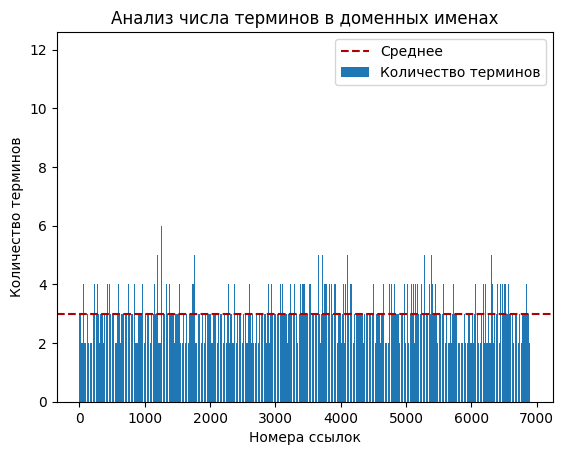

In [37]:
termsGraph("phishing_urls.txt")

**График анализа длины доменных имен фишинговых URL-адресов**

*Входные данные*: путь к файлу с фишинговыми URL-адресами

In [38]:
def domainLengthGraph(urls_path):
    domain_length_data = domainLengthAnalysis(urls_path)
    urls_numbers = range(0, len(domain_length_data))
    plt.bar(urls_numbers, domain_length_data)
    plt.axhline(y=np.mean(domain_length_data), color="#B00000", linestyle='--')
    plt.legend(labels=["Среднее", "Длины доменных имен"], loc='upper right')
    plt.xlabel('Номера ссылок')
    plt.ylabel('Длина доменного имени')
    plt.title('Анализ длин доменных имен')
    plt.show()

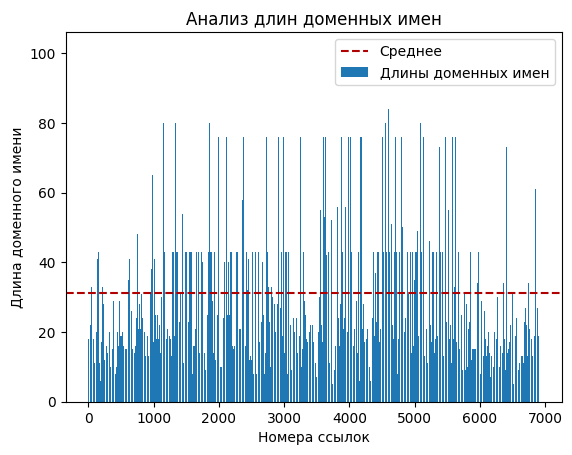

In [39]:
domainLengthGraph("phishing_urls.txt")

**График анализа количества слэшей в фишинговых URL-адресах**

*Входные данные*: путь к файлу с фишинговыми URL-адресами

In [40]:
def slashesGraph(urls_path):
    slashes_data = slashesNumberAnalysis(urls_path)
    urls_numbers = range(0, len(slashes_data))
    plt.bar(urls_numbers, slashes_data)
    plt.axhline(y=np.mean(slashes_data), color="#B00000", linestyle='--')
    plt.legend(labels=["Среднее", "Количество слэшей"], loc='upper right')
    plt.xlabel('Номера ссылок')
    plt.ylabel('Количество слэшей')
    plt.title('Анализ числа слэшей в доменных именах')
    plt.show()

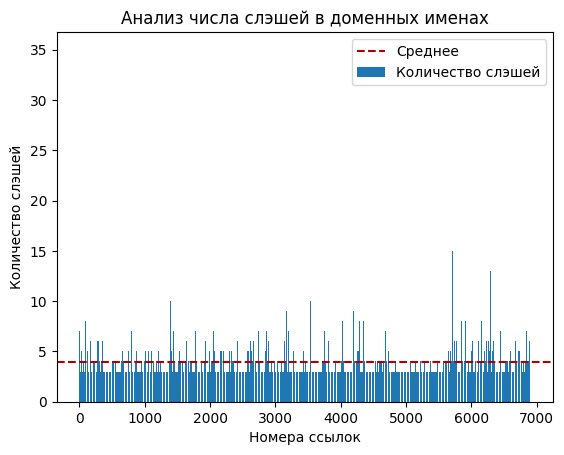

In [41]:
slashesGraph("phishing_urls.txt")

**График анализа наличия специальных символов в доменном имени фишинговых URL-адресов**

*Входные данные*: путь к файлу с фишинговыми URL-адресами

In [42]:
def specialCharactersGraph(urls_path):
    special_characters_data = specialCharactersAnalysis(urls_path)
    labels = list(special_characters_data.keys())
    values = list(special_characters_data[a] for a in labels)
    plt.title('Анализ наличия специальных символов в доменных именах')
    plt.pie(values, labels=labels, shadow=True, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')
    plt.show()

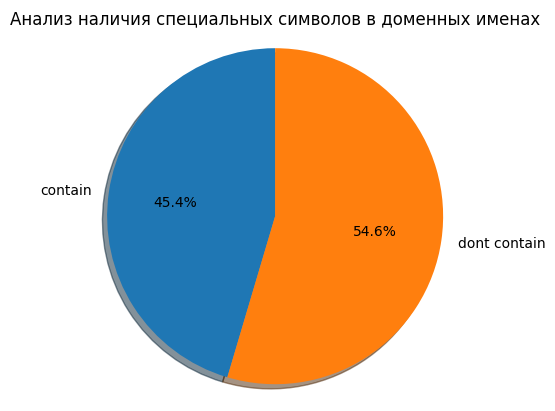

In [43]:
specialCharactersGraph("phishing_urls.txt")

**График анализа наличия IP-адреса в доменном имени фишинговых URL-адресов**

*Входные данные*: путь к файлу с фишинговыми URL-адресами

In [44]:
def ipGraph(urls_path):
    ip_data = ipAnalysis(urls_path)
    labels = list(ip_data.keys())
    values = list(ip_data[a] for a in labels)
    plt.title('Анализ наличия IP адреса в доменных именах')
    plt.pie(values, labels=labels, explode=[0.5, 0], shadow=True, autopct='%1.1f%%', startangle=180)
    plt.axis('equal')
    plt.show()

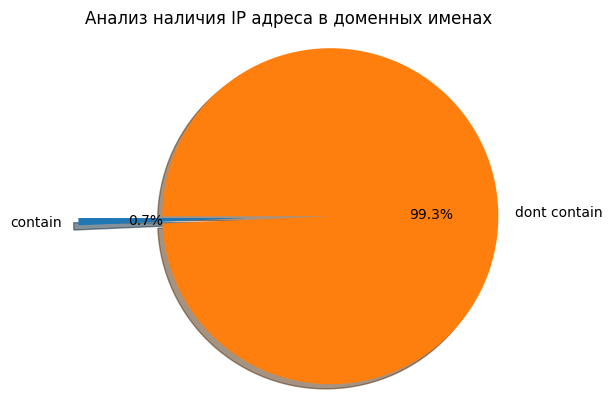

In [45]:
ipGraph("phishing_urls.txt")

**График анализа наличия юникода в фишинговых URL адресах**

*Входные данные*: путь к файлу с фишинговыми URL-адресами

In [46]:
def unicodeGraph(urls_path):
    unicode_data = unicodeAnalysis(urls_path)
    labels = list(unicode_data.keys())
    values = list(unicode_data[a] for a in labels)
    plt.title('Анализ наличия юникода в URL-адресах')
    plt.pie(values, labels=labels, explode=[0.3, 0], shadow=True, autopct='%1.1f%%', startangle=180)
    plt.axis('equal')
    plt.show()

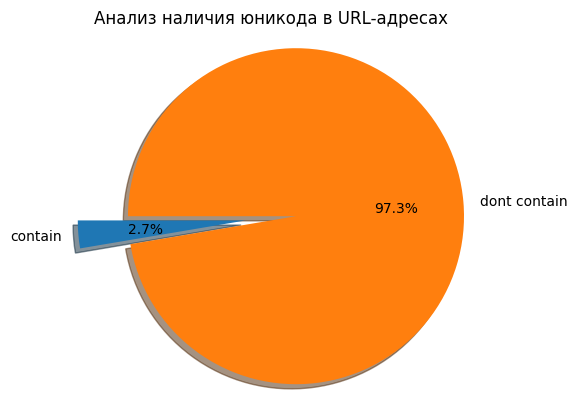

In [47]:
unicodeGraph("phishing_urls.txt")

**График анализа наличия http протокола в фишинговых URL адресах**

*Входные данные*: путь к файлу с фишинговыми URL-адресами

In [48]:
def httpGraph(urls_path):
    http_data = httpAnalysis(urls_path)
    labels = list(http_data.keys())
    values = list(http_data[a] for a in labels)
    plt.title('Анализ наличия http протокола URL-адресах')
    plt.pie(values, labels=labels, explode=[0.3, 0], shadow=True, autopct='%1.1f%%', startangle=180)
    plt.axis('equal')
    plt.show()

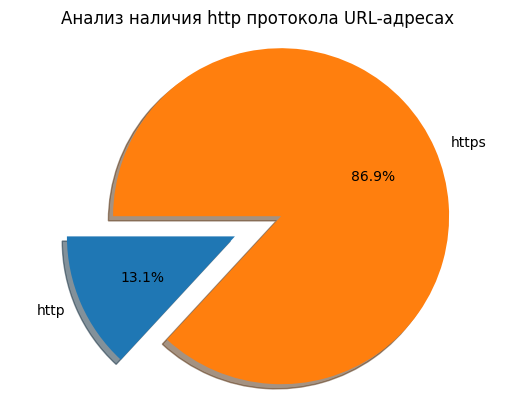

In [49]:
httpGraph("phishing_urls.txt")

**График анализа наличия поддомена в фишинговых URL адресах**

*Входные данные*: путь к файлу с фишинговыми URL-адресами

In [50]:
def subdomainGraph(urls_path):
    subdomain_data = subdomainAnalysis(urls_path)
    labels = list(subdomain_data.keys())
    values = list(subdomain_data[a] for a in labels)
    plt.title('Анализ наличия поддомена в URL-адресах')
    plt.pie(values, labels=labels, shadow=True, autopct='%1.1f%%', startangle=40)
    plt.axis('equal')
    plt.show()

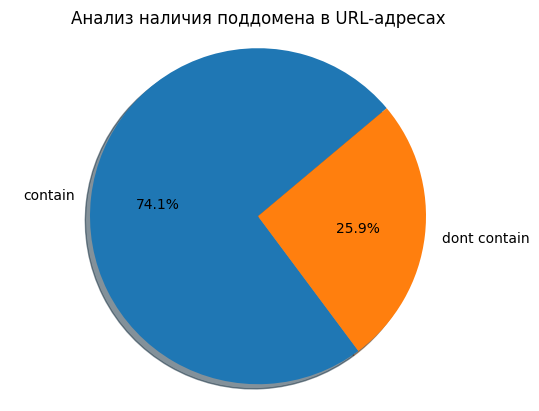

In [51]:
subdomainGraph("phishing_urls.txt")

**График анализа ключевых слов в пути фишинговых URL-адресов**

*Входные данные*: путь к файлу с фишинговыми URL-адресами

*Примечание*: перед построением графика из полученных на вход данных удаляются слова, которые встречаются достаточно редко

In [52]:
def wordsInPathGraph(urls_path):
    words_data = wordsInPathAnalysis(urls_path)
    labels = list(words_data.keys())
    for a in labels:
        if(words_data[a] < 200):
            words_data.pop(a)
    labels = list(words_data.keys())
    values = list(words_data[a] for a in labels)
    plt.bar(labels, values)
    for i in range(len(values)):
        plt.annotate(str(values[i]), (i, values[i] + 10), ha='center')
    plt.xlabel('Слова')
    plt.ylabel('Частота использования')
    plt.title('Анализ ключевых слов в пути URL-адреса')
    plt.show()

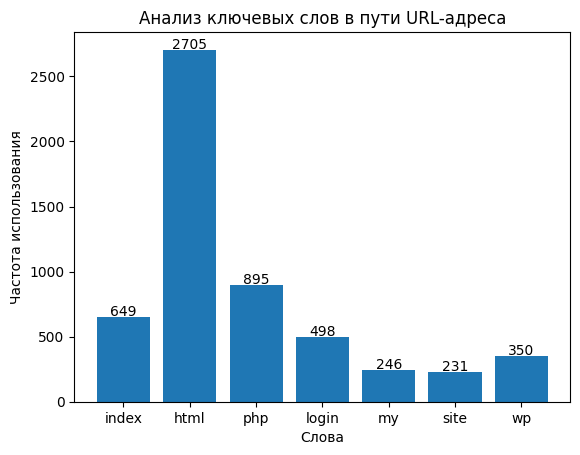

In [53]:
wordsInPathGraph("phishing_urls.txt")

**График анализа количества точек в пути фишинговых URL адресов**

*Входные данные*: путь к файлу с фишинговыми URL-адресами

In [54]:
def dotsInPathGraph(urls_path):
    dots_data = dotsInPathAnalysis(urls_path)
    urls_numbers = range(0, len(dots_data))
    plt.bar(urls_numbers, dots_data)
    plt.axhline(y=np.mean(dots_data), color="#B00000", linestyle='--')
    plt.legend(labels=["Среднее", "Количество точек в пути URL"], loc='upper right')
    plt.xlabel('Номера ссылок')
    plt.ylabel('Количество точек')
    plt.title('Анализ числа точек в пути URL-адреса')
    plt.show()

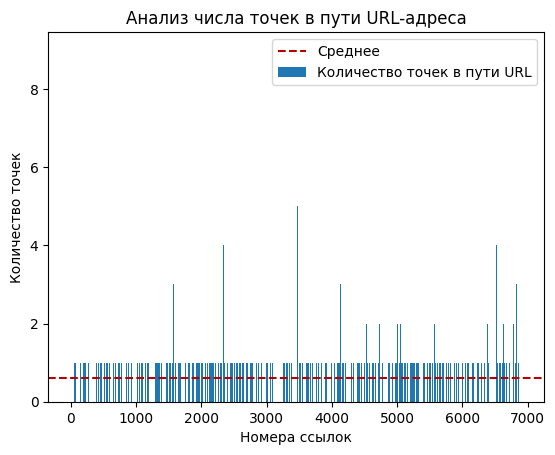

In [55]:
dotsInPathGraph("phishing_urls.txt")

**График анализа длины фишинговых URL-адресов**

*Входные данные*: путь к файлу с фишинговыми URL-адресами

In [56]:
def urlLengthGraph(urls_path):
    length_data = urlLengthAnalysis(urls_path)
    urls_numbers = range(0, len(length_data))
    plt.bar(urls_numbers, length_data)
    plt.ylim(0, 1000)
    plt.axhline(y=np.mean(length_data), color="#B00000", linestyle='--')
    plt.legend(labels=["Среднее", "Длины URL"], loc='upper right')
    plt.yticks(list(range(0, 1000, 50)))
    plt.xlabel('Номера ссылок')
    plt.ylabel('Длина URL-адреса')
    plt.title('Анализ длины URL-адреса')
    plt.show()

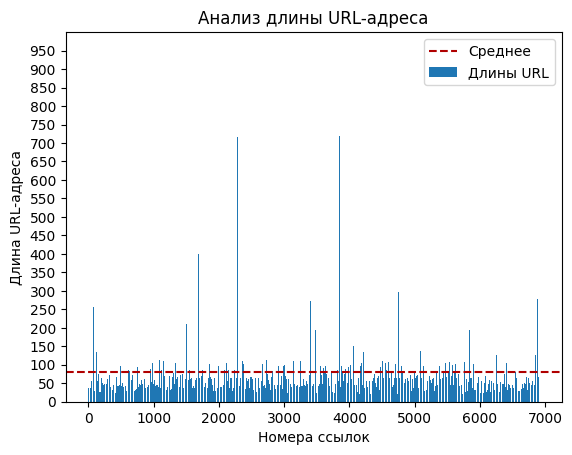

In [57]:
urlLengthGraph("phishing_urls.txt")

**Создание DataFrame, содержащих результаты анализа**

---


**DataFrame количественных характеристик**

*Входные данные*: путь к файлу с фишинговыми URL-адресами

*Выходные данные*: DataFrame с результатами анализа

Примечания:
  1. Количественными характеристиками будем считать такие характеристики, как число терминов, слэшей, точек в пути, длина доменных имен, URL-адресов
  2. 'np.min()' - возвращает минимальное значение из массива NumPy
  3. 'np.max()' - возвращает максимальное значение из массива NymPy
  4. 'np.mean()' - возвращает среднее значение из массива NumPy


In [58]:
def numberDataFrameCreate(urls_path):
    terms = termsAnalysis(urls_path)
    domain_length = domainLengthAnalysis(urls_path)
    slashes = slashesNumberAnalysis(urls_path)
    dots = dotsInPathAnalysis(urls_path)
    url_length = urlLengthAnalysis(urls_path)
    col = ["Описание характеристики", "Минимуму", "Максимум", "Среднее"]
    dt = [
        ["Количество терминов в доменном имени", np.min(terms), np.amax(terms), round(np.mean(terms), 2)],
        ["Длина доменного имени", np.min(domain_length), np.amax(domain_length), round(np.mean(domain_length), 2)],
        ["Количество слэшей в URL-адресе", np.min(slashes), np.amax(slashes), round(np.mean(slashes), 2)],
        ["Количество точек в пути URL-адреса", np.min(dots), np.amax(dots), round(np.mean(dots), 2)],
        ["Длина URL-адреса", np.min(url_length), np.amax(url_length), round(np.mean(url_length), 2)]
    ]
    df = pd.DataFrame(columns=col, data=dt)
    return df

**DataFrame анализа наличия конкретных признаков**

*Входные данные*: путь к файлу с фишинговыми URL-адресами

*Выходные данные*: DataFrame с результатами анализа

*Примечание*: перед созданием DataFrame рассчитываются процентные соотношения распространенности конкретных признаков

In [59]:
def containDataFrameCreate(urls_path):
    special_characters = specialCharactersAnalysis(urls_path)
    special_characters_prc = (special_characters["contain"] * 100) / (special_characters["contain"] + special_characters["dont contain"])
    ip = ipAnalysis(urls_path)
    ip_prc = (ip["contain"] * 100) / (ip["contain"] + ip["dont contain"])
    unicode = unicodeAnalysis(urls_path)
    unicode_prc = (unicode["contain"] * 100) / (unicode["contain"] + unicode["dont contain"])
    http = httpAnalysis(urls_path)
    http_prc = (http["http"] * 100) / (http["http"] + http["https"])
    subdomain = subdomainAnalysis(urls_path)
    subdomain_prc = (subdomain["contain"] * 100) / (subdomain["contain"] + subdomain["dont contain"])
    col = ["Описание характеристики", "Процент содержания"]
    dt = [
        ["Наличие специальных символов в доменном имени", str(round(special_characters_prc, 2)) + " %"],
        ["Наличие ip в доменном имени", str(round(ip_prc, 2)) + " %"],
        ["Наличие юникода в URL-адресе", str(round(unicode_prc, 2)) + " %"],
        ["Наличие http протокола", str(round(http_prc, 2)) + " %"],
        ["Наличие поддомена", str(round(subdomain_prc, 2)) + " %"]
    ]
    df = pd.DataFrame(columns=col, data=dt)
    return df

**DataFrame ключевых слов в пути фишинговых URL-адресов**

*Входные данные*: путь к файлу с фишинговыми URL-адресами

*Выходные данные*: DataFrame с результатами анализа

*Примечание*: перед созданием DataFrame из полученных на вход данных удаляются слова, которые встречаются достаточно редко

In [60]:
def wordsDataFrameCreate(urls_path):
    words = wordsInPathAnalysis(urls_path)
    keys = list(words.keys())
    for a in keys:
        if(words[a] < 200):
            words.pop(a)
    keys = list(words.keys())
    col = ["Слова", "Частота"]
    dt = []
    for i in range(len(keys)):
        mas = [keys[i], words[keys[i]]]
        dt.append(mas)
    df = pd.DataFrame(columns=col, data=dt)
    return df

**Сохранение результатов анализа в .xlsx файл**

*Входные данные*: путь сохранения .xlsx файла, путь к файлу с фишинговыми адресами

In [61]:
def excelCreate(path, urls_path):
    df01 = numberDataFrameCreate(urls_path)
    df02 = containDataFrameCreate(urls_path)
    df03 = wordsDataFrameCreate(urls_path)
    with ExcelWriter(path) as writer:
        df01.to_excel(writer, sheet_name="Анализ количественных х-тик", index=False)
        df02.to_excel(writer, sheet_name="Анализ наличия некоторых х-тик", index=False)
        df03.to_excel(writer, sheet_name="Анализ ключевых слов в пути URL", index=False)

In [62]:
excelCreate("results.xlsx", "phishing_urls.txt")